# Geração automatica de digitos com Redes Adversárias Generativas (GAN's)

Treinamento de uma GAN com a base de dados MNIST, para geração automática de dígitos manuscritos.

## Importações e Preprocessamento

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import InputLayer , Dense, Flatten, Reshape
from keras.regularizers import L1L2
from keras_adversarial import AdversarialModel, simple_gan, gan_targets
from keras_adversarial import AdversarialOptimizerSimultaneous, normal_latent_sampling

Using TensorFlow backend.


In [2]:
(previsores_treinamento, _),(_,_) = mnist.load_data()

In [3]:
treinamento = previsores_treinamento.astype('float32')/255

## Criação Gerador

In [7]:
gerador = Sequential()

In [8]:
#Primeira e segunda camada com units arbitrarios - Testar
gerador.add(Dense(units=500, input_dim=100, activation='relu',
                  kernel_regularizer=L1L2(1e-5, 1e-5)))
gerador.add(Dense(units=500, input_dim=100, activation='relu',
                  kernel_regularizer=L1L2(1e-5, 1e-5)))
#Terceira camada = Saida units = 784=28*28
gerador.add(Dense(units=784, activation='sigmoid',
                  kernel_regularizer=L1L2(1e-5, 1e-5)))
gerador.add(Reshape((28,28)))

## Criação Discriminador

In [9]:
discriminador = Sequential()

In [10]:
discriminador.add(InputLayer(input_shape=(28,28)))
discriminador.add(Flatten())
discriminador.add(Dense(units=500, activation='relu',
                        kernel_regularizer=L1L2(1e-5, 1e-5)))
discriminador.add(Dense(units=500, activation='relu',
                        kernel_regularizer=L1L2(1e-5, 1e-5)))
discriminador.add(Dense(units=1, activation='sigmoid',
                        kernel_regularizer=L1L2(1e-5, 1e-5)))

## Criação GAN e Treinamento

In [11]:
gan = simple_gan(gerador, discriminador, normal_latent_sampling((100,)))

In [12]:
modelo = AdversarialModel(base_model = gan,
                          player_params=[gerador.trainable_weights,
                                         discriminador.trainable_weights])


In [13]:
modelo.adversarial_compile(adversarial_optimizer=AdversarialOptimizerSimultaneous(),
                          player_optimizers=['adam','adam'],
                          loss='binary_crossentropy')



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [14]:
modelo.fit(x = treinamento, y = gan_targets(60000), epochs = 200, batch_size=256)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor

Epoch 1/200






60000/60000 [==============================] - 16s 263us/step - loss: 23.3599 - player_0_loss: 20.6712 - player_0_yfake_loss: 8.6104 - player_0_yreal_loss: 9.4181 - player_1_loss: 2.6887 - player_1_yfake_loss: 0.0165 - player_1_yreal_loss: 0.0296
Epoch 2/200
60000/60000 [==============================] - 15s 250us/step - loss: 28.8825 - player_0_loss: 27.2921 - player_0_yfake_loss: 13.9222 - player_0_yreal_loss: 11.7805 - player_1_loss: 1.5905 - player_1_yfake_loss: 4.9280e-05 - player_1_yreal_loss: 0.0011
Epoch 3/200
60000/60000 [==============================] - 16s 268us/step - loss: 19.2526 - player_0_loss: 18.1357 - player_0_yfake_loss: 7.6647 - player_0_yreal_loss: 9.3585 - player_1_loss: 1.1169 - player_1_yfake_loss: 0.0015 - player_1_yreal_loss: 0.0030
Epoch 4/200
60000/60000 [==============================] - 16s 271us/step - loss: 20.9588 -

60000/60000 [==============================] - 15s 243us/step - loss: 19.0242 - player_0_loss: 18.5825 - player_0_yfake_loss: 8.8724 - player_0_yreal_loss: 9.2698 - player_1_loss: 0.4416 - player_1_yfake_loss: 5.5470e-04 - player_1_yreal_loss: 7.8099e-04
Epoch 24/200
60000/60000 [==============================] - 14s 227us/step - loss: 19.8485 - player_0_loss: 19.3992 - player_0_yfake_loss: 8.4178 - player_0_yreal_loss: 10.5334 - player_1_loss: 0.4494 - player_1_yfake_loss: 8.0531e-04 - player_1_yreal_loss: 6.0700e-04
Epoch 25/200
60000/60000 [==============================] - 15s 244us/step - loss: 23.1675 - player_0_loss: 22.7061 - player_0_yfake_loss: 8.9722 - player_0_yreal_loss: 13.2736 - player_1_loss: 0.4614 - player_1_yfake_loss: 6.9676e-04 - player_1_yreal_loss: 4.8854e-04
Epoch 26/200
60000/60000 [==============================] - 15s 256us/step - loss: 20.9843 - player_0_loss: 20.5380 - player_0_yfake_loss: 8.6603 - player_0_yreal_loss: 11.4321 - player_1_loss: 0.4463 - play

60000/60000 [==============================] - 16s 259us/step - loss: 20.4679 - player_0_loss: 19.5735 - player_0_yfake_loss: 6.1929 - player_0_yreal_loss: 12.5070 - player_1_loss: 0.8943 - player_1_yfake_loss: 0.0081 - player_1_yreal_loss: 0.0126
Epoch 55/200
60000/60000 [==============================] - 16s 267us/step - loss: 20.2012 - player_0_loss: 19.2938 - player_0_yfake_loss: 6.0513 - player_0_yreal_loss: 12.3640 - player_1_loss: 0.9074 - player_1_yfake_loss: 0.0116 - player_1_yreal_loss: 0.0173
Epoch 56/200
60000/60000 [==============================] - 17s 287us/step - loss: 20.6245 - player_0_loss: 19.6822 - player_0_yfake_loss: 6.2645 - player_0_yreal_loss: 12.5134 - player_1_loss: 0.9424 - player_1_yfake_loss: 0.0144 - player_1_yreal_loss: 0.0236
Epoch 57/200
60000/60000 [==============================] - 14s 240us/step - loss: 20.0369 - player_0_loss: 19.0957 - player_0_yfake_loss: 6.1407 - player_0_yreal_loss: 12.0467 - player_1_loss: 0.9412 - player_1_yfake_loss: 0.0133

60000/60000 [==============================] - 14s 226us/step - loss: 15.1194 - player_0_loss: 13.8687 - player_0_yfake_loss: 3.8751 - player_0_yreal_loss: 8.9824 - player_1_loss: 1.2507 - player_1_yfake_loss: 0.0976 - player_1_yreal_loss: 0.1419
Epoch 86/200
60000/60000 [==============================] - 14s 229us/step - loss: 14.8256 - player_0_loss: 13.5564 - player_0_yfake_loss: 3.8191 - player_0_yreal_loss: 8.7251 - player_1_loss: 1.2692 - player_1_yfake_loss: 0.1077 - player_1_yreal_loss: 0.1494
Epoch 87/200
60000/60000 [==============================] - 14s 227us/step - loss: 14.4864 - player_0_loss: 13.1806 - player_0_yfake_loss: 3.8690 - player_0_yreal_loss: 8.2860 - player_1_loss: 1.3058 - player_1_yfake_loss: 0.1161 - player_1_yreal_loss: 0.1642
Epoch 88/200
60000/60000 [==============================] - 14s 227us/step - loss: 14.5152 - player_0_loss: 13.1965 - player_0_yfake_loss: 3.7807 - player_0_yreal_loss: 8.3698 - player_1_loss: 1.3187 - player_1_yfake_loss: 0.1140 - p

60000/60000 [==============================] - 14s 227us/step - loss: 11.6486 - player_0_loss: 10.0594 - player_0_yfake_loss: 3.2028 - player_0_yreal_loss: 5.6885 - player_1_loss: 1.5892 - player_1_yfake_loss: 0.1956 - player_1_yreal_loss: 0.2256
Epoch 117/200
60000/60000 [==============================] - 14s 226us/step - loss: 11.3701 - player_0_loss: 9.7401 - player_0_yfake_loss: 2.9531 - player_0_yreal_loss: 5.6122 - player_1_loss: 1.6300 - player_1_yfake_loss: 0.2057 - player_1_yreal_loss: 0.2496
Epoch 118/200
60000/60000 [==============================] - 14s 229us/step - loss: 10.8447 - player_0_loss: 9.1896 - player_0_yfake_loss: 2.7929 - player_0_yreal_loss: 5.2238 - player_1_loss: 1.6551 - player_1_yfake_loss: 0.2156 - player_1_yreal_loss: 0.2667
Epoch 119/200
60000/60000 [==============================] - 14s 228us/step - loss: 11.4512 - player_0_loss: 9.8233 - player_0_yfake_loss: 2.8917 - player_0_yreal_loss: 5.7471 - player_1_loss: 1.6279 - player_1_yfake_loss: 0.2012 - p

60000/60000 [==============================] - 13s 224us/step - loss: 10.3033 - player_0_loss: 8.5899 - player_0_yfake_loss: 2.6205 - player_0_yreal_loss: 4.7544 - player_1_loss: 1.7135 - player_1_yfake_loss: 0.2263 - player_1_yreal_loss: 0.2721
Epoch 148/200
60000/60000 [==============================] - 13s 225us/step - loss: 10.3782 - player_0_loss: 8.6484 - player_0_yfake_loss: 2.6220 - player_0_yreal_loss: 4.8079 - player_1_loss: 1.7298 - player_1_yfake_loss: 0.2295 - player_1_yreal_loss: 0.2817
Epoch 149/200
60000/60000 [==============================] - 13s 224us/step - loss: 10.2669 - player_0_loss: 8.5349 - player_0_yfake_loss: 2.5974 - player_0_yreal_loss: 4.7187 - player_1_loss: 1.7320 - player_1_yfake_loss: 0.2301 - player_1_yreal_loss: 0.2830
Epoch 150/200
60000/60000 [==============================] - 13s 225us/step - loss: 10.3270 - player_0_loss: 8.6122 - player_0_yfake_loss: 2.5634 - player_0_yreal_loss: 4.8328 - player_1_loss: 1.7148 - player_1_yfake_loss: 0.2224 - pl

60000/60000 [==============================] - 14s 226us/step - loss: 9.5734 - player_0_loss: 7.8128 - player_0_yfake_loss: 2.3817 - player_0_yreal_loss: 4.2415 - player_1_loss: 1.7606 - player_1_yfake_loss: 0.2612 - player_1_yreal_loss: 0.3098
Epoch 179/200
60000/60000 [==============================] - 14s 227us/step - loss: 9.5649 - player_0_loss: 7.8013 - player_0_yfake_loss: 2.3699 - player_0_yreal_loss: 4.2335 - player_1_loss: 1.7636 - player_1_yfake_loss: 0.2599 - player_1_yreal_loss: 0.3059
Epoch 180/200
60000/60000 [==============================] - 14s 226us/step - loss: 9.4463 - player_0_loss: 7.6637 - player_0_yfake_loss: 2.3054 - player_0_yreal_loss: 4.1600 - player_1_loss: 1.7826 - player_1_yfake_loss: 0.2680 - player_1_yreal_loss: 0.3164
Epoch 181/200
60000/60000 [==============================] - 14s 227us/step - loss: 9.2420 - player_0_loss: 7.4553 - player_0_yfake_loss: 2.2975 - player_0_yreal_loss: 3.9628 - player_1_loss: 1.7866 - player_1_yfake_loss: 0.2744 - player

## Validação e resultados

In [15]:
amostras = np.random.normal(size = (20,100))
previsao = gerador.predict(amostras)

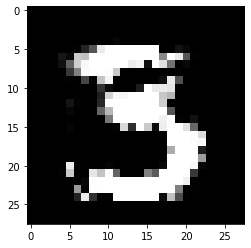

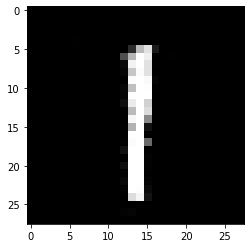

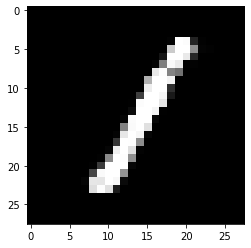

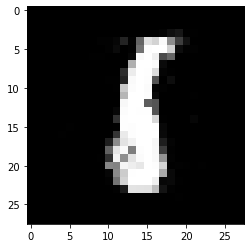

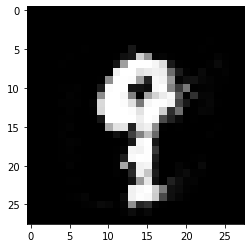

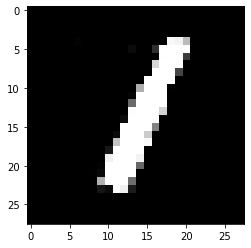

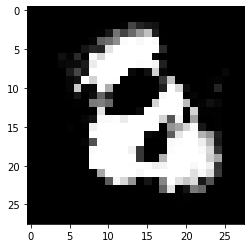

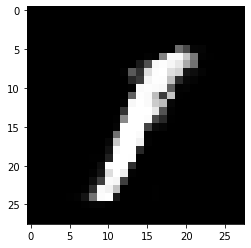

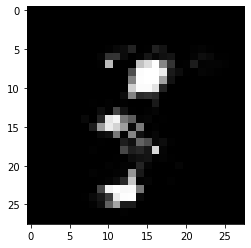

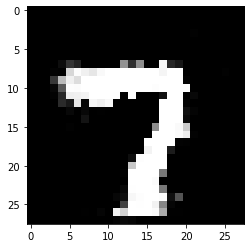

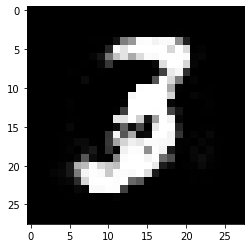

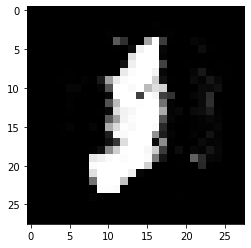

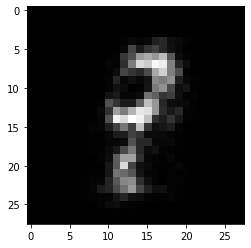

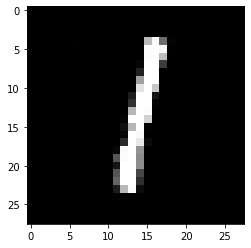

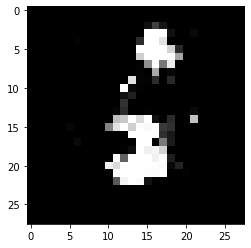

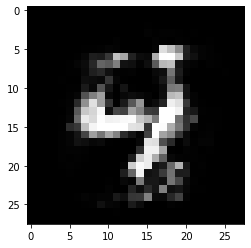

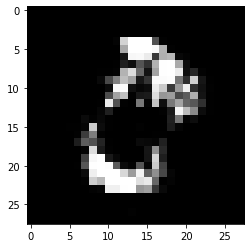

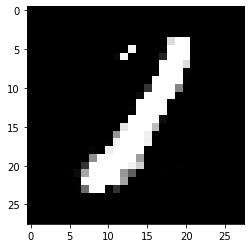

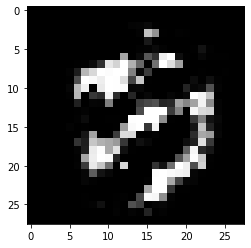

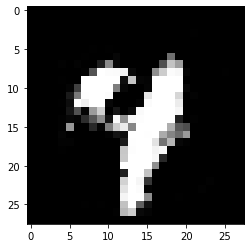

In [16]:
for i in range(previsao.shape[0]):
    plt.imshow(previsao[i, :], cmap='gray')
    plt.show()

In [17]:
import os

In [19]:
# serialize model to JSON
model_json = gerador.to_json()
with open("gerador.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
gerador.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
